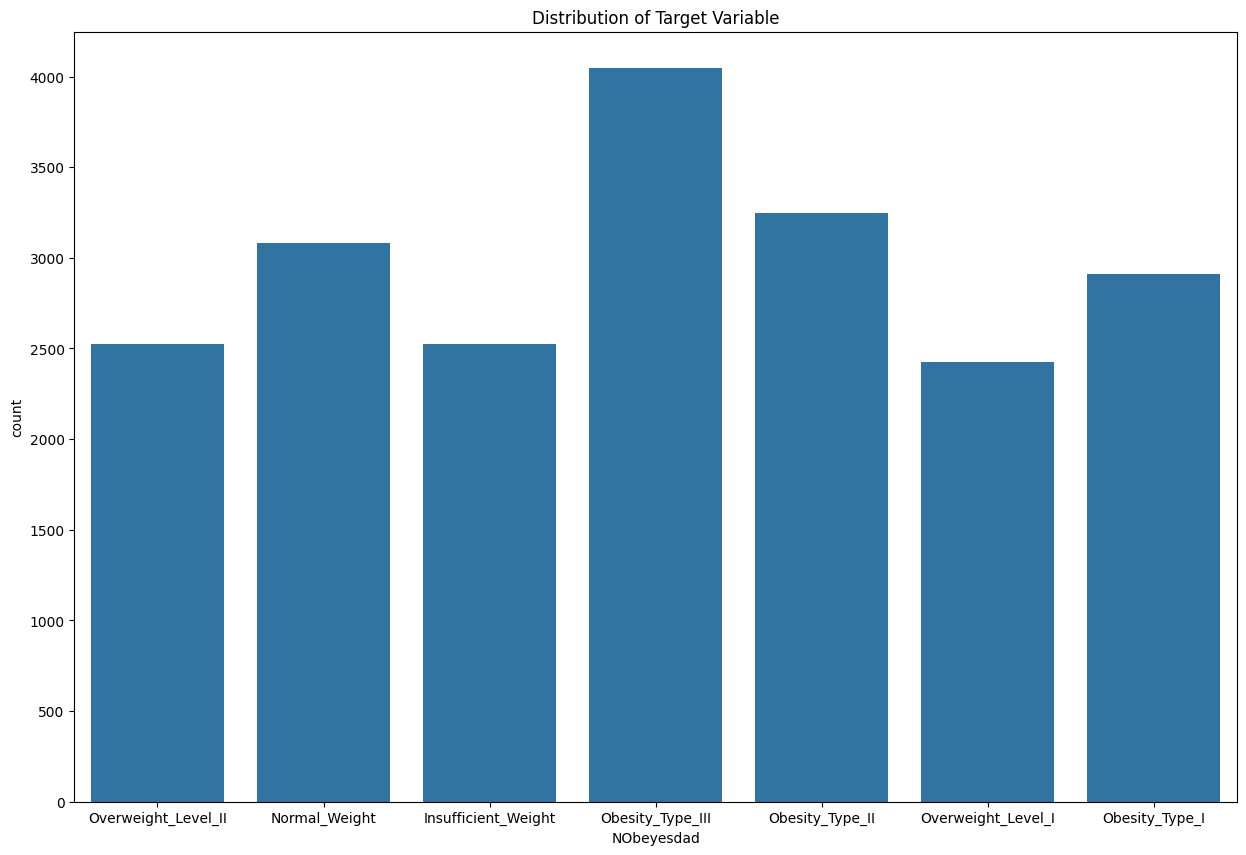

\Accuracy: 0.8405587668593449


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt




train_data = pd.read_csv("Dataset.csv") # Load dataset into train_data variable.




plt.figure(figsize=(15, 10))
sns.countplot(x="NObeyesdad", data=train_data)
plt.title("Distribution of Target Variable") # Show the distribution of the categorical value NObeyesdad.
plt.show()


label_encoder = LabelEncoder()
train_data['NObeyesdad'] = label_encoder.fit_transform(train_data['NObeyesdad']) # LabelEncoder transforms the non-numerical values into numerical labels.


X = train_data.drop(columns=['NObeyesdad', 'id']) # Set the variable X to a copy of the dataset with the columns of NObeyesdad and id removed.
y = train_data['NObeyesdad']                      # Set the variable y to the list of values for NObeyesdad.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Divides the dataset into training and testing subsets.

"""The random_state parameter controls the random number generator used to shuffle the data.
It ensures that the same randomization is done each time we run the code, resutling in the same splits of data."""


X_train_encoded = pd.get_dummies(X_train)    # The pd.get_dummies() function converts categorical variables into indicator variables.
X_test_encoded = pd.get_dummies(X_test)



model = LogisticRegression(max_iter=1000) # The max_iter parameter sets the maximum number of iterations for our model to converge
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded) #Running the model on our test dataset.

accuracy = accuracy_score(y_test, y_pred)  # This compares the results of the model to the actual values of the test dataset.
print("\Accuracy:", accuracy)

#Accuracy score: 84%
